In [17]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from torch.utils.data import random_split

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

val_size = 0.2
val_samples = int(val_size * len(train_dataset))

train_samples = len(train_dataset) - val_samples

train_dataset, val_dataset = random_split(train_dataset, [train_samples, val_samples])


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [18]:
# hyperparameters
batch_size = 32
learning_rate = 0.01
num_epochs = 5
momentum = 0.9

In [19]:
train = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=4)
test = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True, num_workers=4)
val = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False, pin_memory=True, num_workers=4)

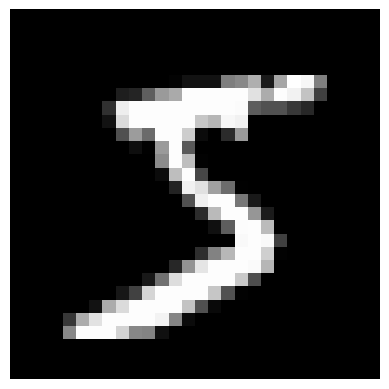

In [20]:
plt.imshow(train_dataset.dataset.data[0], cmap='gray')
plt.axis("off")
plt.show()

In [21]:
class CNN(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.conv1 = nn.Conv2d(1, 6, 5) # 1 input, 6 output, 5 kernel size
        self.maxPool = nn.MaxPool2d(2, 2) # 2 kernel size, 2 stride, no padding
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.maxPool(F.relu(self.conv1(x)))
        x = self.maxPool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = self.fc1(x)

        return x
    
model = CNN().to(device)

In [22]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

In [23]:
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    train_correct = 0
    total_train_samples = 0

    for X, y in train:
        X, y = X.to(device), y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        train_correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        total_train_samples += y.size(0)

    avg_train_loss = total_train_loss / len(train)
    train_accuracy = train_correct / total_train_samples

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_train_loss:.4f}, Accuracy: {train_accuracy:.4f}")


Epoch 1/5, Loss: 0.2329, Accuracy: 0.9279
Epoch 2/5, Loss: 0.0787, Accuracy: 0.9756
Epoch 3/5, Loss: 0.0602, Accuracy: 0.9817
Epoch 4/5, Loss: 0.0489, Accuracy: 0.9852
Epoch 5/5, Loss: 0.0418, Accuracy: 0.9869
